In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

In [2]:
tu_nhien = pd.read_excel('assets/data_split.xlsx','Tu nhien')
tu_nhien = tu_nhien.iloc[:, 1:]
tunhien_y = tu_nhien.iloc[:,-1]
tunhien_X = tu_nhien.drop("label", axis=1)
tunhien_X.head()

,190,191,192,193,194,195,196,197,198,199,...,791,792,793,794,795,796,797,798,799,800
0,0.6230,0.6186,0.6125,0.6332,0.6381,0.6454,0.6492,0.6284,0.6537,0.6814,...,0.0272,0.0276,0.0276,0.0274,0.0272,0.0274,0.0276,0.0275,0.0275,0.0275
1,0.7271,0.7496,0.7629,0.7577,0.7800,0.7863,0.7664,0.7712,0.8128,0.8295,...,0.0288,0.0291,0.0294,0.0291,0.0287,0.0285,0.0286,0.0287,0.0285,0.0284
2,0.7271,0.7010,0.6892,0.7180,0.7502,0.7638,0.7574,0.7597,0.7649,0.7644,...,0.0253,0.0256,0.0256,0.0255,0.0255,0.0256,0.0255,0.0255,0.0258,0.0262
3,0.6281,0.6499,0.6559,0.6435,0.6595,0.6586,0.6535,0.6747,0.6989,0.7004,...,-0.0034,-0.0033,-0.0033,-0.0032,-0.0033,-0.0035,-0.0032,-0.0031,-0.0034,-0.0032
4,0.6483,0.6339,0.6206,0.6254,0.6411,0.6602,0.6608,0.6632,0.6680,0.6737,...,-0.0038,-0.0041,-0.0040,-0.0038,-0.0039,-0.0039,-0.0040,-0.0039,-0.0038,-0.0035


In [3]:
thuong_mai = pd.read_excel('assets/data_split.xlsx','Thuong mai')
thuong_mai = thuong_mai.iloc[:, 1:]
thuong_mai

,190,191,192,193,194,195,196,197,198,199,...,792,793,794,795,796,797,798,799,800,label
0,0.3534,0.3508,0.3554,0.3700,0.3675,0.3590,0.3619,0.3617,0.3664,0.3860,...,0.0253,0.0255,0.0253,0.0251,0.0251,0.0252,0.0248,0.0248,0.0252,Sundril
1,0.5715,0.5756,0.5667,0.5631,0.5843,0.5953,0.5984,0.6001,0.6123,0.6358,...,0.0319,0.0318,0.0314,0.0314,0.0315,0.0316,0.0314,0.0314,0.0318,Tepi
2,0.5257,0.5264,0.5338,0.5402,0.5348,0.5378,0.5352,0.5240,0.5341,0.5501,...,-0.0084,-0.0087,-0.0086,-0.0085,-0.0085,-0.0086,-0.0085,-0.0080,-0.0079,Twister
3,0.7076,0.6937,0.6870,0.6903,0.7114,0.7295,0.7236,0.7209,0.7051,0.7325,...,-0.0094,-0.0098,-0.0098,-0.0096,-0.0096,-0.0097,-0.0097,-0.0095,-0.0092,Vfresh
4,0.5497,0.5473,0.5502,0.5567,0.5587,0.5677,0.5764,0.5729,0.5749,0.5918,...,0.0272,0.0273,0.0271,0.0269,0.0268,0.0269,0.0269,0.0270,0.0271,VL
5,0.5094,0.5132,0.5031,0.4967,0.4986,0.5043,0.5294,0.5284,0.5280,0.5469,...,-0.0002,-0.0001,-0.0002,-0.0005,-0.0005,-0.0001,0.0000,-0.0002,0.0000,NC 01
6,0.4831,0.4921,0.5076,0.5065,0.5262,0.5442,0.5402,0.5399,0.5517,0.5575,...,-0.0025,-0.0027,-0.0025,-0.0027,-0.0031,-0.0028,-0.0024,-0.0024,-0.0023,NC02
7,0.5033,0.4907,0.4821,0.4963,0.5003,0.5117,0.5331,0.5388,0.5429,0.5547,...,-0.0027,-0.0027,-0.0026,-0.0026,-0.0027,-0.0028,-0.0027,-0.0025,-0.0022,NC 03
8,0.5443,0.5361,0.5198,0.5120,0.5277,0.5413,0.5409,0.5407,0.5469,0.5615,...,-0.0020,-0.0019,-0.0019,-0.0020,-0.0021,-0.0020,-0.0020,-0.0022,-0.0018,NC 04
9,0.4805,0.5001,0.5049,0.5105,0.5126,0.5119,0.5291,0.5379,0.5480,0.5558,...,-0.0025,-0.0023,-0.0025,-0.0028,-0.0027,-0.0026,-0.0026,-0.0024,-0.0023,NC 06


In [4]:
thuongmai_y = thuong_mai.iloc[:,-1]
thuongmai_X = thuong_mai.drop("label", axis=1)

In [5]:
thuongmai_y

0       Sundril
1          Tepi
2       Twister
3        Vfresh
4            VL
5         NC 01
6          NC02
7         NC 03
8         NC 04
9         NC 06
10      THTM 01
11      THTM 02
12      THTM 03
13      THTM 04
14      THTM 05
15      THTM 06
16        TM 02
17        TM 03
18        TM 04
19        TM 05
20        TM 06
21    VFRESH 01
22    VFRESH 02
23    VFRESH 03
24    VFRESH 04
25    VFRESH 05
26    VFRESH 06
27     FANTA 01
28     FANTA 02
29     FANTA 03
30     FANTA 04
31     FANTA 05
32     FANTA 06
33        FANTA
Name: label, dtype: object

<Figure size 432x288 with 0 Axes>

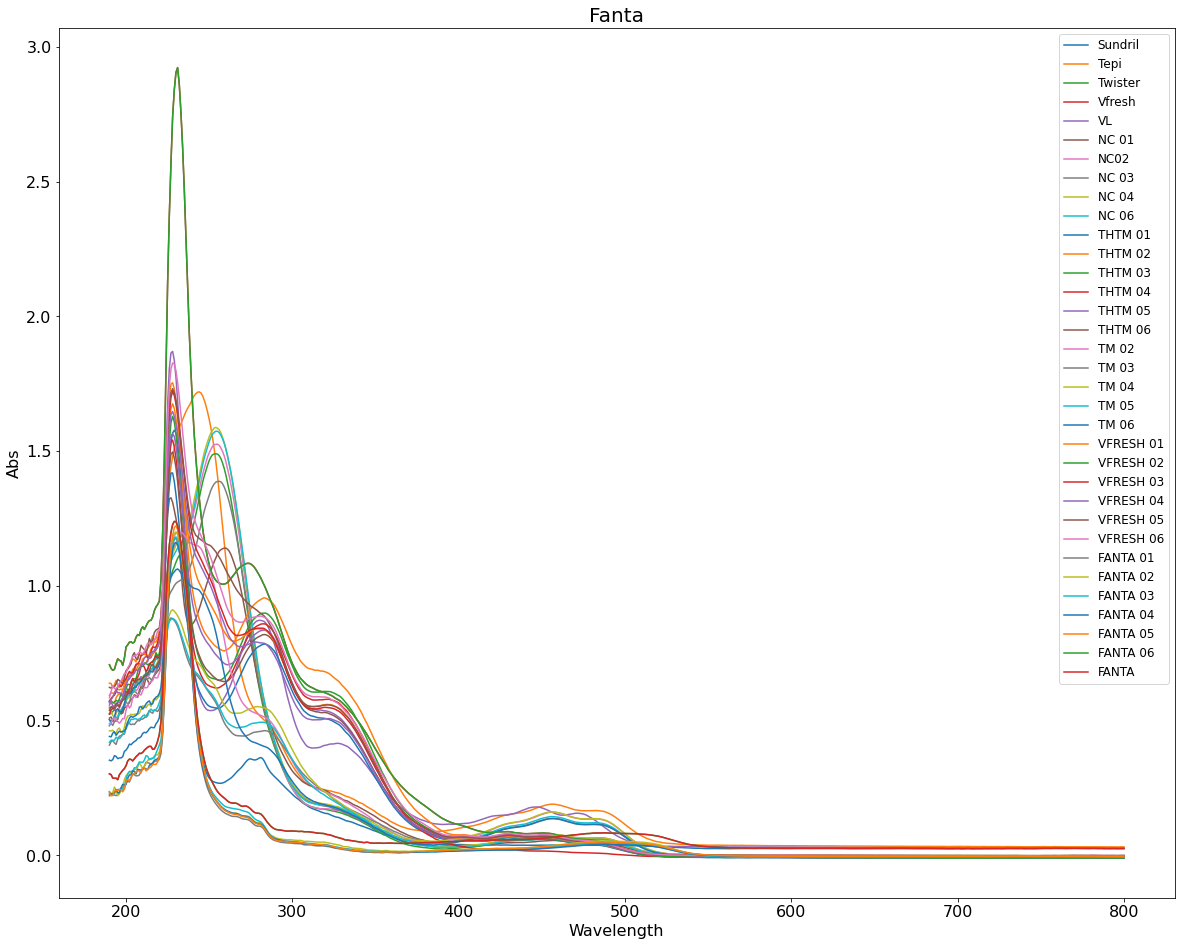

In [6]:
fig = plt.figure()
plt.figure(figsize=(20, 16))
plt.plot(thuongmai_X.T, label=thuongmai_y)

plt.legend(fontsize=12)
plt.title('Fanta', fontsize=20)
plt.xlabel('Wavelength', fontsize=16)
plt.ylabel('Abs', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

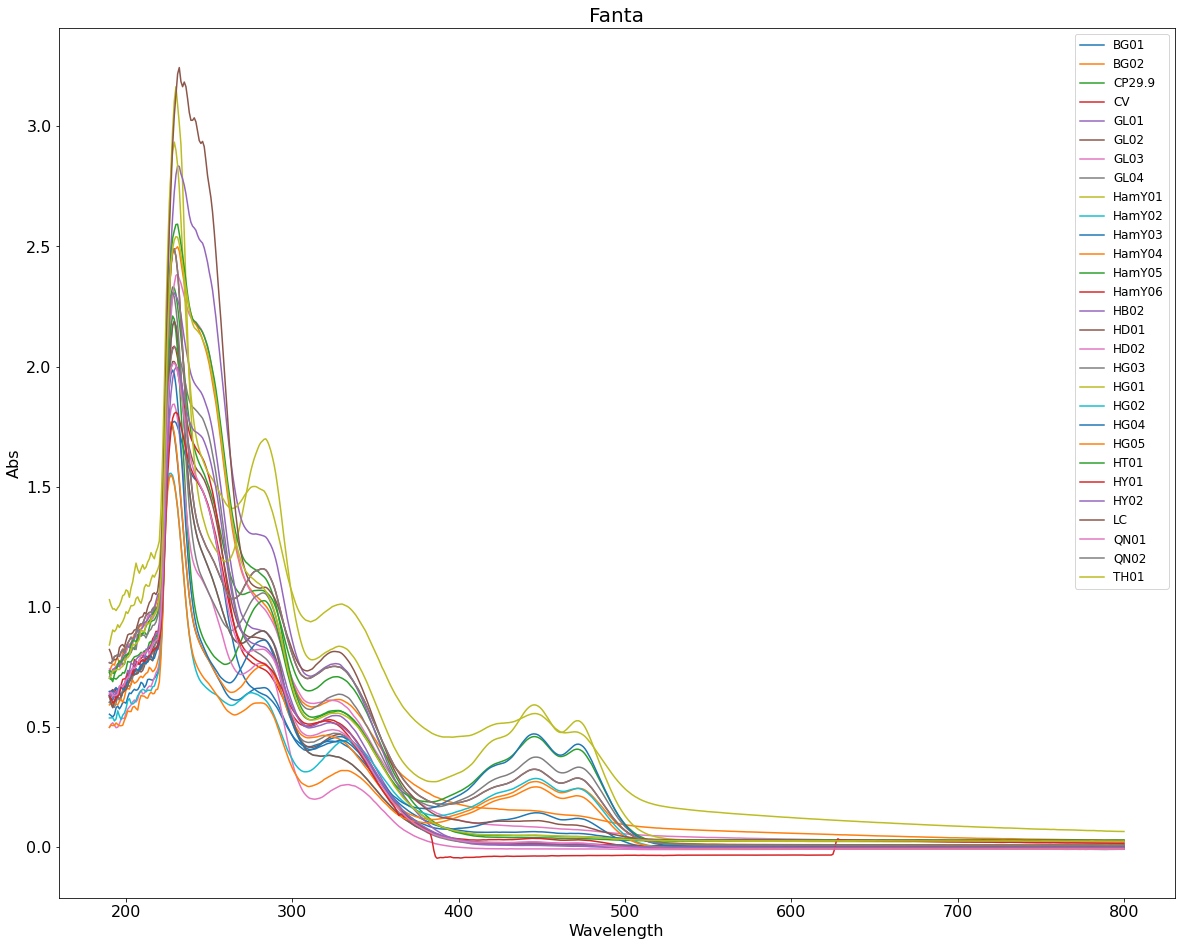

In [7]:
fig = plt.figure()
plt.figure(figsize=(20, 16))
plt.plot(tunhien_X.T, label=tunhien_y)

plt.legend(fontsize=12)
plt.title('Fanta', fontsize=20)
plt.xlabel('Wavelength', fontsize=16)
plt.ylabel('Abs', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [8]:
df_train = pd.read_excel("assets/data_split.xlsx", 'train_50').sample(frac=1)
df_train.head()

,Unnamed: 0,190,191,192,193,194,195,196,197,198,...,793,794,795,796,797,798,799,800,label,encode
42,43,0.2353,0.2298,0.2258,0.2287,0.2414,0.2450,0.2442,0.2480,0.2502,...,-0.0062,-0.0063,-0.0063,-0.0063,-0.0064,-0.0064,-0.0061,-0.0059,FANTA 03,1
22,23,0.5715,0.5756,0.5667,0.5631,0.5843,0.5953,0.5984,0.6001,0.6123,...,0.0318,0.0314,0.0314,0.0315,0.0316,0.0314,0.0314,0.0318,Tepi,1
33,34,0.4881,0.4905,0.5043,0.5115,0.5042,0.4965,0.4907,0.4978,0.5084,...,-0.0021,-0.0019,-0.0023,-0.0025,-0.0023,-0.0022,-0.0023,-0.0024,TM 02,1
44,45,0.3028,0.2996,0.2870,0.2860,0.2867,0.2809,0.2994,0.3076,0.3159,...,0.0263,0.0261,0.0257,0.0257,0.0261,0.0261,0.0259,0.0260,FANTA 06,1
9,10,0.6308,0.5983,0.5811,0.6055,0.6114,0.6360,0.6398,0.6260,0.6432,...,0.0028,0.0025,0.0023,0.0026,0.0027,0.0027,0.0028,0.0030,HD01,0


In [9]:
df_test = pd.read_excel("assets/data_split.xlsx", 'test').sample(frac=1)
df_test.head()

,Unnamed: 0,190,191,192,193,194,195,196,197,198,...,793,794,795,796,797,798,799,800,label,encode
3,4,0.5380,0.5383,0.5391,0.5257,0.5341,0.5678,0.5461,0.5315,0.5496,...,-0.0047,-0.0050,-0.0052,-0.0049,-0.0047,-0.0049,-0.0049,-0.0047,HG02,0
5,6,0.8228,0.8057,0.7748,0.7803,0.7815,0.7922,0.8301,0.8398,0.8433,...,0.0281,0.0282,0.0281,0.0279,0.0277,0.0279,0.0280,0.0282,LC,0
8,9,0.5940,0.6032,0.6025,0.6016,0.6185,0.6168,0.6141,0.6174,0.6139,...,-0.0014,-0.0015,-0.0018,-0.0020,-0.0019,-0.0019,-0.0018,-0.0015,VFRESH 01,1
0,1,0.6308,0.5983,0.5811,0.6055,0.6114,0.6360,0.6398,0.6260,0.6432,...,0.0028,0.0025,0.0023,0.0026,0.0027,0.0027,0.0028,0.0030,HamY02,0
11,12,0.3028,0.2996,0.2870,0.2860,0.2867,0.2809,0.2994,0.3076,0.3159,...,0.0263,0.0261,0.0257,0.0257,0.0261,0.0261,0.0259,0.0260,FANTA,1


In [10]:
y_train = df_train.iloc[:, -1]
y_test = df_test.iloc[:, -1]
y_test

3     0
5     0
8     1
0     0
11    1
9     1
6     1
7     1
1     0
10    1
2     0
4     0
12    1
Name: encode, dtype: int64

In [11]:
X_train = df_train.drop(["label", "encode"], axis=1).iloc[:, 1:]
X_test = df_test.drop(["label", "encode"], axis=1).iloc[:, 1:]
X_test

,190,191,192,193,194,195,196,197,198,199,...,791,792,793,794,795,796,797,798,799,800
3,0.5380,0.5383,0.5391,0.5257,0.5341,0.5678,0.5461,0.5315,0.5496,0.5583,...,-0.0051,-0.0048,-0.0047,-0.0050,-0.0052,-0.0049,-0.0047,-0.0049,-0.0049,-0.0047
5,0.8228,0.8057,0.7748,0.7803,0.7815,0.7922,0.8301,0.8398,0.8433,0.8331,...,0.0281,0.0281,0.0281,0.0282,0.0281,0.0279,0.0277,0.0279,0.0280,0.0282
8,0.5940,0.6032,0.6025,0.6016,0.6185,0.6168,0.6141,0.6174,0.6139,0.6250,...,-0.0018,-0.0016,-0.0014,-0.0015,-0.0018,-0.0020,-0.0019,-0.0019,-0.0018,-0.0015
0,0.6308,0.5983,0.5811,0.6055,0.6114,0.6360,0.6398,0.6260,0.6432,0.6499,...,0.0024,0.0026,0.0028,0.0025,0.0023,0.0026,0.0027,0.0027,0.0028,0.0030
11,0.3028,0.2996,0.2870,0.2860,0.2867,0.2809,0.2994,0.3076,0.3159,0.3222,...,0.0258,0.0260,0.0263,0.0261,0.0257,0.0257,0.0261,0.0261,0.0259,0.0260
9,0.5665,0.5777,0.5867,0.6026,0.6139,0.6028,0.6046,0.5983,0.5968,0.6138,...,-0.0031,-0.0030,-0.0029,-0.0029,-0.0029,-0.0028,-0.0027,-0.0029,-0.0030,-0.0028
6,0.4831,0.4921,0.5076,0.5065,0.5262,0.5442,0.5402,0.5399,0.5517,0.5575,...,-0.0024,-0.0025,-0.0027,-0.0025,-0.0027,-0.0031,-0.0028,-0.0024,-0.0024,-0.0023
7,0.4805,0.5001,0.5049,0.5105,0.5126,0.5119,0.5291,0.5379,0.5480,0.5558,...,-0.0028,-0.0025,-0.0023,-0.0025,-0.0028,-0.0027,-0.0026,-0.0026,-0.0024,-0.0023
1,0.7028,0.6981,0.7010,0.7025,0.6996,0.7059,0.7141,0.7160,0.7271,0.7245,...,0.0078,0.0079,0.0078,0.0078,0.0078,0.0077,0.0076,0.0076,0.0078,0.0081
10,0.4622,0.4621,0.4647,0.4557,0.4536,0.4679,0.4728,0.4582,0.4565,0.4758,...,-0.0009,-0.0007,-0.0007,-0.0009,-0.0009,-0.0009,-0.0007,-0.0006,-0.0007,-0.0006


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
n_components = 5
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

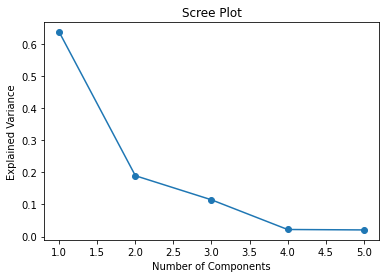

In [14]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

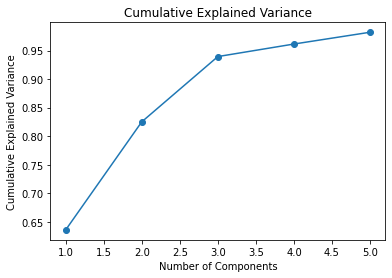

In [15]:
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train_pca, y_train)
LR.predict(X_test_pca)
LR.score(X_test_pca, y_test)

0.8461538461538461

In [17]:
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(n_components,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])
optimizer=SGD(lr=1e-3, momentum=0.9, decay=1e-2/500)
# Compile the model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pca, y_train, epochs=500, batch_size=4, validation_data=(X_test_pca, y_test))

Epoch 1/500


c:\Users\84866\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


13/13 [==============================] - 1s 18ms/step - loss: 0.7133 - accuracy: 0.5600 - val_loss: 0.6483 - val_accuracy: 0.6923
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6000 - accuracy: 0.5800 - val_loss: 0.5779 - val_accuracy: 0.6923
Epoch 3/500
13/13 [==============================] - 0s 9ms/step - loss: 0.5289 - accuracy: 0.8000 - val_loss: 0.5281 - val_accuracy: 0.7692
Epoch 4/500
13/13 [==============================] - 0s 9ms/step - loss: 0.5055 - accuracy: 0.8400 - val_loss: 0.4832 - val_accuracy: 0.9231
Epoch 5/500
13/13 [==============================] - 0s 7ms/step - loss: 0.4830 - accuracy: 0.8400 - val_loss: 0.4581 - val_accuracy: 1.0000
Epoch 6/500
13/13 [==============================] - 0s 7ms/step - loss: 0.4576 - accuracy: 0.9000 - val_loss: 0.4269 - val_accuracy: 1.0000
Epoch 7/500
13/13 [==============================] - 0s 7ms/step - loss: 0.4370 - accuracy: 0.9400 - val_loss: 0.3902 - val_accuracy: 1.0000
Epoch 8/500
13/13 [=====

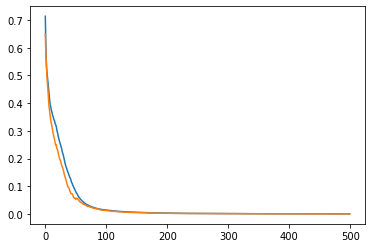

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

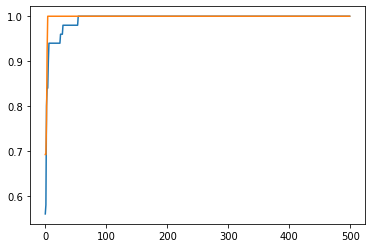

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [20]:
y_pred = model.predict(X_test_pca)
y_pred[y_pred > 0.5] = 1 
y_pred[y_pred <= 0.5] = 0 

pred_df = pd.DataFrame(y_pred, columns=["Predict"])
test_df = pd.DataFrame(y_test.values, columns=["Test"])
final_df = pd.concat([pred_df, test_df], axis=1)
final_df

1/1 [==============================] - 0s 80ms/step


,Predict,Test
0,0.0,0
1,0.0,0
2,1.0,1
3,0.0,0
4,1.0,1
5,1.0,1
6,1.0,1
7,1.0,1
8,0.0,0
9,1.0,1


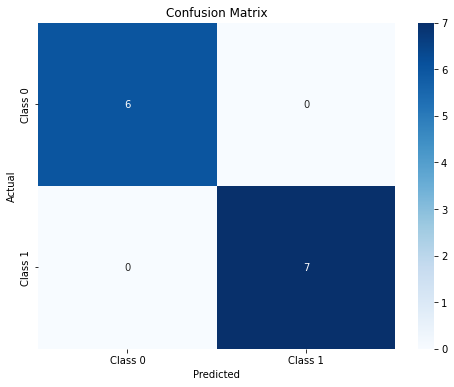

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels if applicable
class_labels = ["Class 0", "Class 1"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy:  1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
